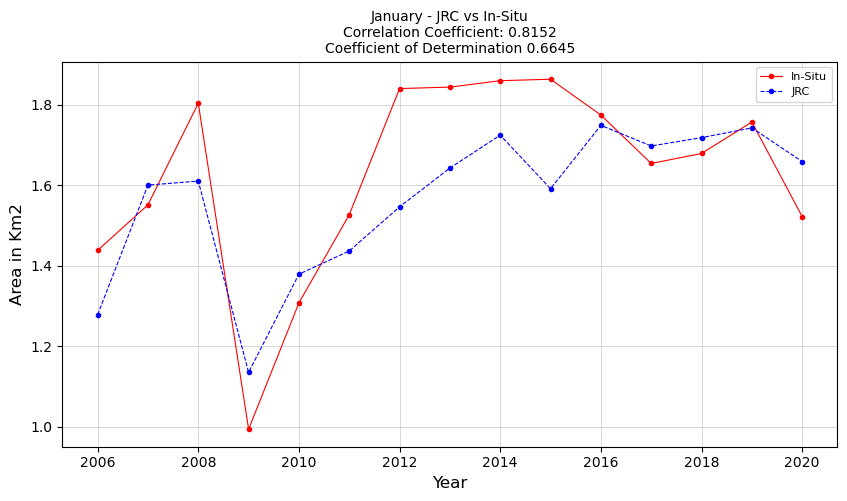

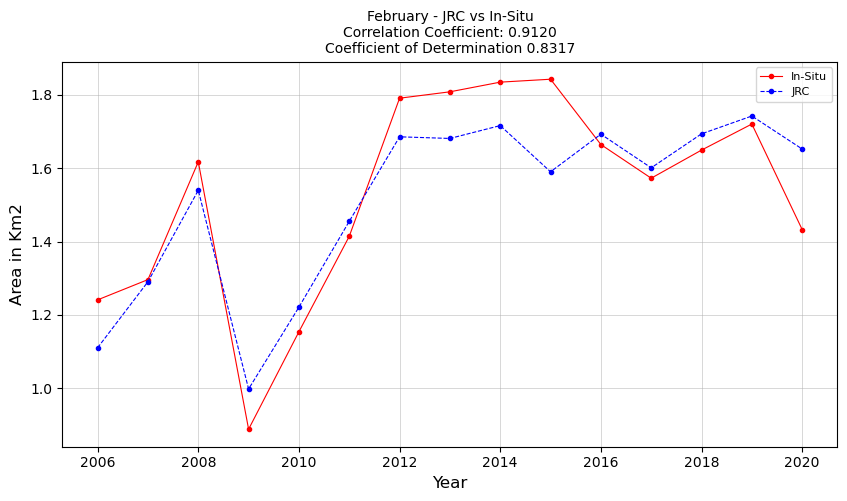

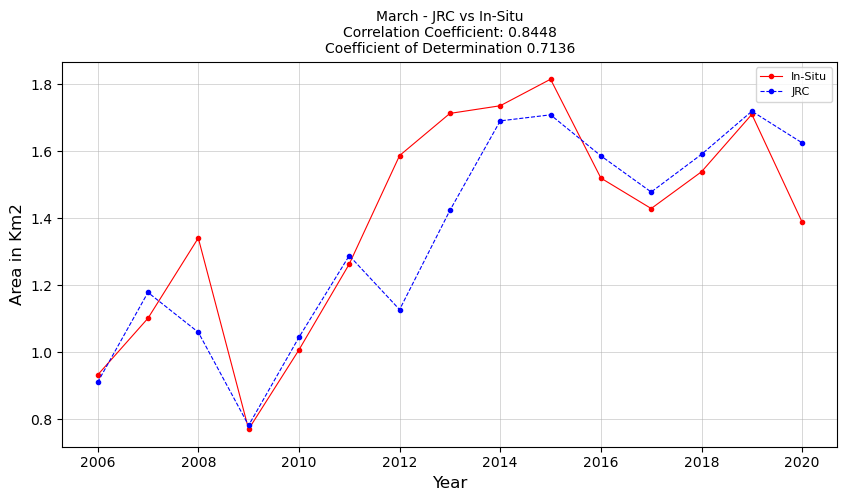

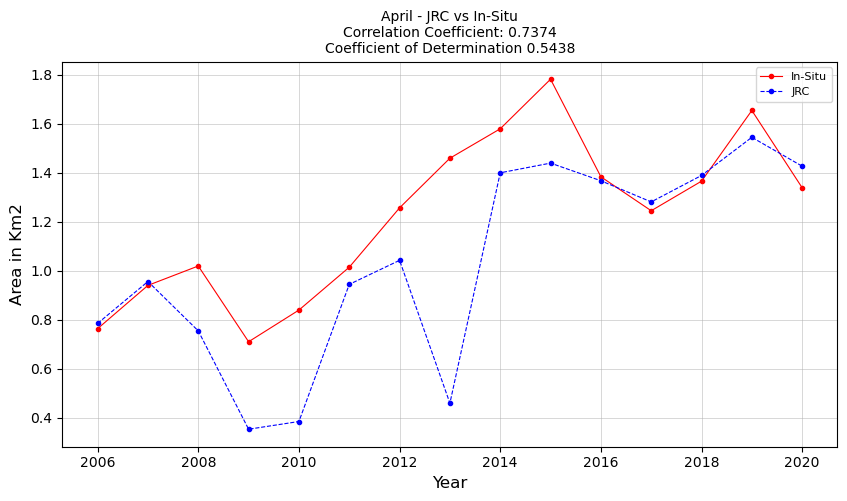

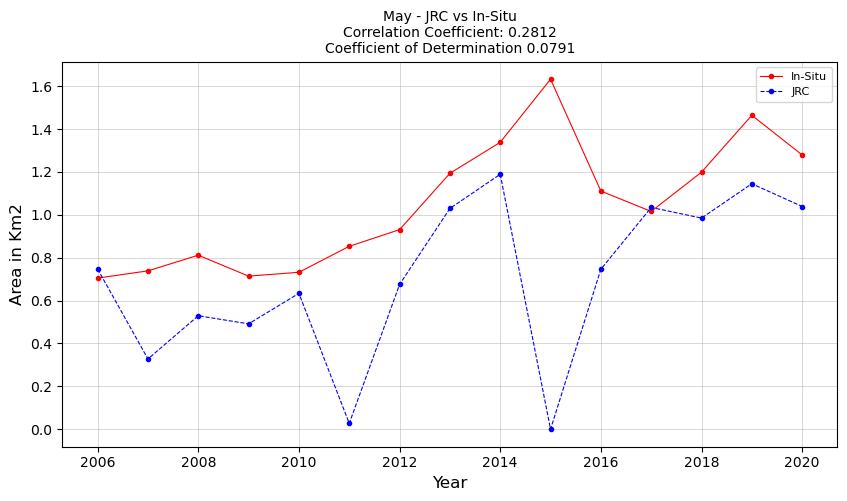

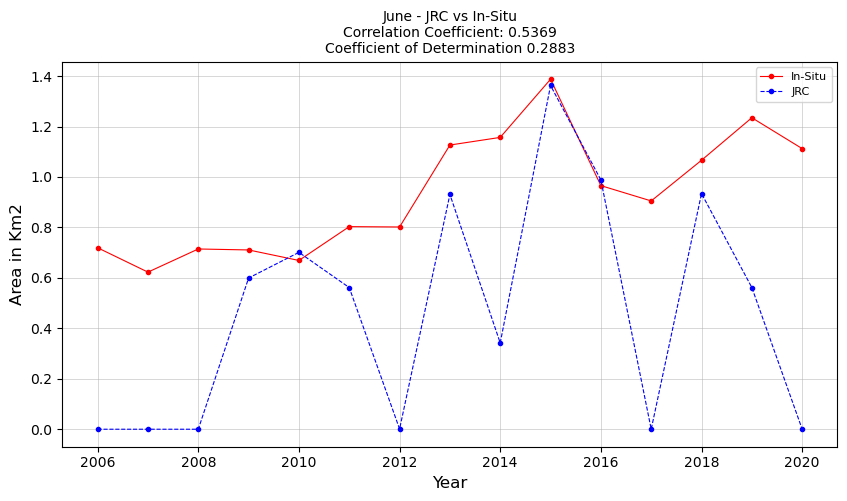

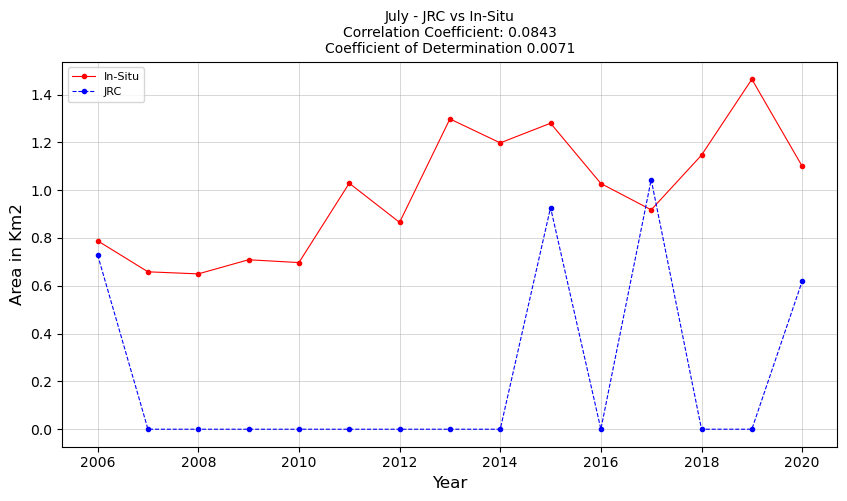

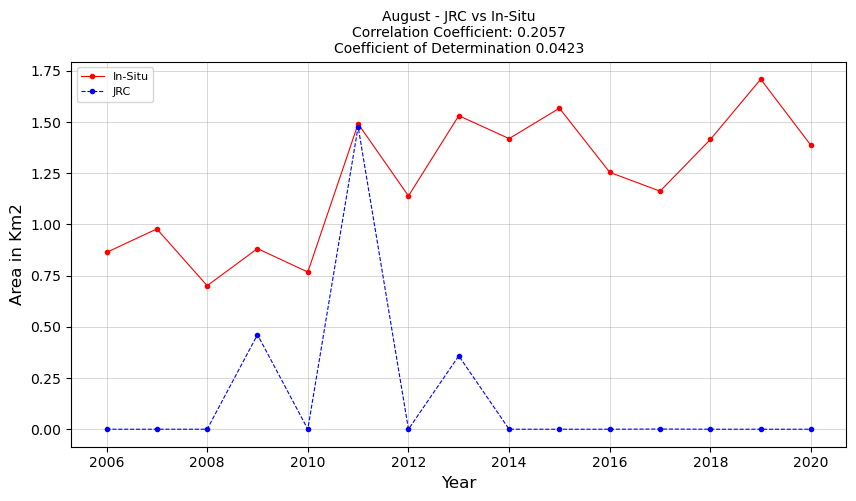

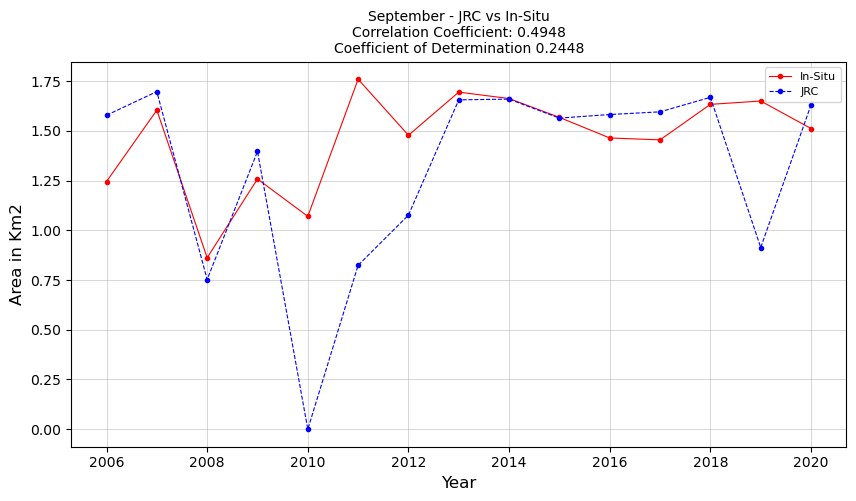

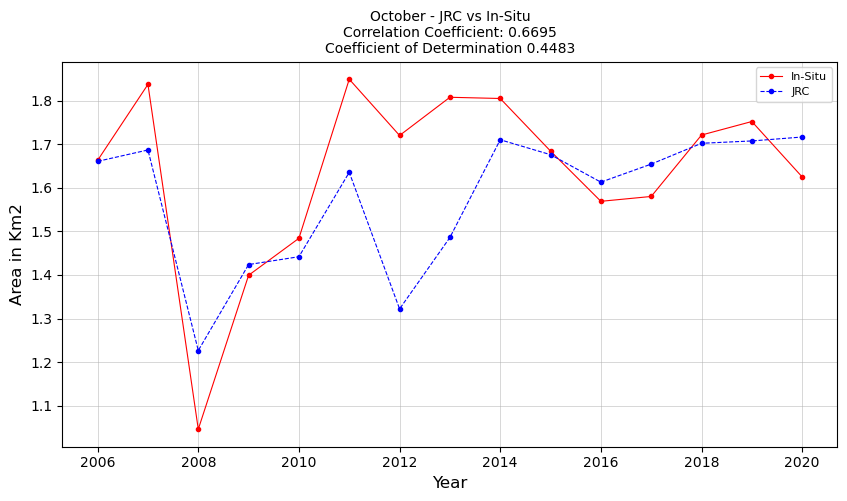

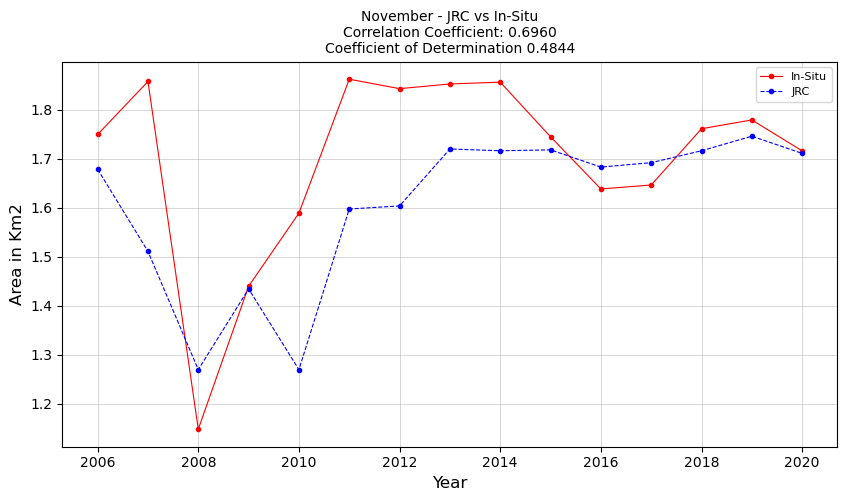

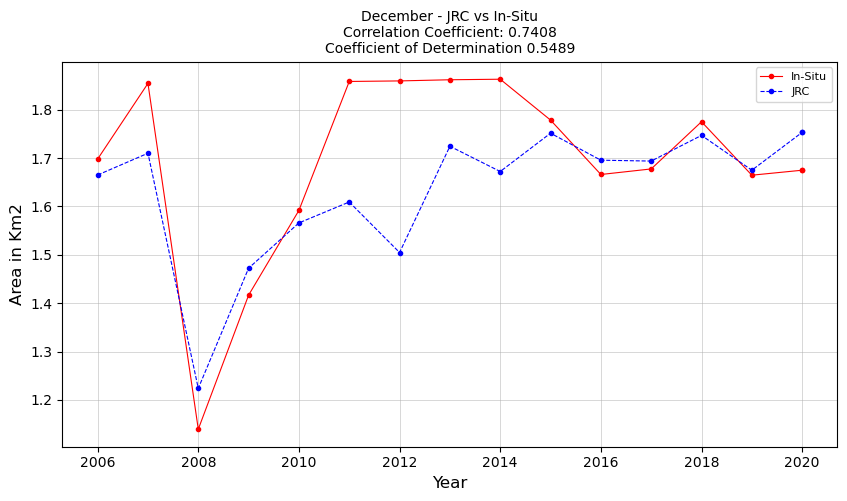


Monthly Correlations between JRC and In-Situ:
January: Correlation Coefficient 0.8152
February: Correlation Coefficient 0.9120
March: Correlation Coefficient 0.8448
April: Correlation Coefficient 0.7374
May: Correlation Coefficient 0.2812
June: Correlation Coefficient 0.5369
July: Correlation Coefficient 0.0843
August: Correlation Coefficient 0.2057
September: Correlation Coefficient 0.4948
October: Correlation Coefficient 0.6695
November: Correlation Coefficient 0.6960
December: Correlation Coefficient 0.7408

Monthly Coefficient of Determination between JRC and In-Situ:
January: Coefficient of Determination 0.6645
February: Coefficient of Determination 0.8317
March: Coefficient of Determination 0.7136
April: Coefficient of Determination 0.5438
May: Coefficient of Determination 0.0791
June: Coefficient of Determination 0.2883
July: Coefficient of Determination 0.0071
August: Coefficient of Determination 0.0423
September: Coefficient of Determination 0.2448
October: Coefficient of Det

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
file_path = "D:/RS Folder/comparisondata2006_2020.csv" 
data = pd.read_csv(file_path)

output_folder = "D:/RS Folder/GEE_Water_Exports/Plots"
os.makedirs(output_folder, exist_ok=True)

months = data['Month'].unique()
monthly_correlations = {}  # Dictionary to store correlations for each month
monthly_correlations_det = {}

for month in months:
    
    month_data = data[data['Month'] == month]
       
    correlation = month_data['Extracted'].corr(month_data['In-Situ']) # Calculate the correlation for the current month
    monthly_correlations[month] = correlation  
    r_squared = correlation**2
    monthly_correlations_det[month]= r_squared   
    
    plt.figure(figsize=(10, 5))
    
    plt.plot(month_data['Year'], month_data['In-Situ'], label='In-Situ', marker='.', linestyle='-',color = 'r', linewidth=0.8)
    plt.plot(month_data['Year'], month_data['Extracted'], label='JRC', marker='.', linestyle='--',color = 'b', linewidth=0.8)
    plt.title(f'{month} - JRC vs In-Situ\nCorrelation Coefficient: {correlation:.4f}\nCoefficient of Determination {r_squared:.4f}', fontsize=10)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Area in Km2', fontsize=12)
    plt.legend(fontsize=8)
    plt.grid(visible=True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.show()
    output_file = os.path.join(output_folder, f"{month}_plot.png")
    plt.savefig(output_file, dpi=500)
    plt.close()


# Display the monthly correlations
print("\nMonthly Correlations between JRC and In-Situ:")
for month, corr in monthly_correlations.items():
    print(f"{month}: Correlation Coefficient {corr:.4f}")

print("\nMonthly Coefficient of Determination between JRC and In-Situ:")
for month, r_squared in monthly_correlations_det.items():
    print(f"{month}: Coefficient of Determination {r_squared:.4f}")

